In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

***Load Dataset***

In [2]:
df = pd.read_csv(r"covertype.csv")

In [3]:
df.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df.shape

(581012, 55)

In [5]:
# Prepare features and target
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

In [6]:
# Shift class labels to start from 0 for XGBoost
y = y - 1  # Cover_Type becomes 0 to 6 instead of 1 to 7


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Save Random Forest model
joblib.dump(rf, 'random_forest_model.pkl')

Random Forest Accuracy: 0.9551646687262807


['random_forest_model.pkl']

In [9]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Save XGBoost model
joblib.dump(xgb, 'xgboost_model.pkl')

C:\Users\BAJWA LAPTOPS\anaconda3\envs\torch_gpu\lib\site-packages\xgboost\training.py:183: UserWarning: [11:24:56] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8711823274786366


['xgboost_model.pkl']

In [10]:
# Predict a sample input (manually entered or randomly selected)
sample = X_test.iloc[0].values.reshape(1, -1)
prediction_rf = rf.predict(sample)
prediction_xgb = xgb.predict(sample)

print("\nSample input prediction:")
print("Random Forest prediction:", prediction_rf[0])
print("XGBoost prediction:", prediction_xgb[0])



Sample input prediction:
Random Forest prediction: 0
XGBoost prediction: 0


C:\Users\BAJWA LAPTOPS\anaconda3\envs\torch_gpu\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


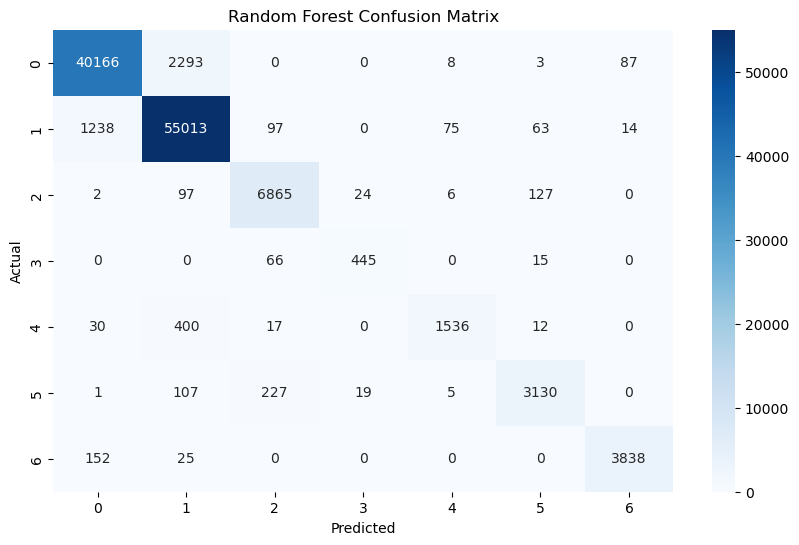

In [11]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
